In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
import shap
import joblib
from statannot.statannot import add_stat_annotation
from lib.data_load_utils import load_CULPRIT_data, get_data_from_features
from lib.experiment_definitions import get_features
from sklearn.calibration import calibration_curve


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Models train test performance

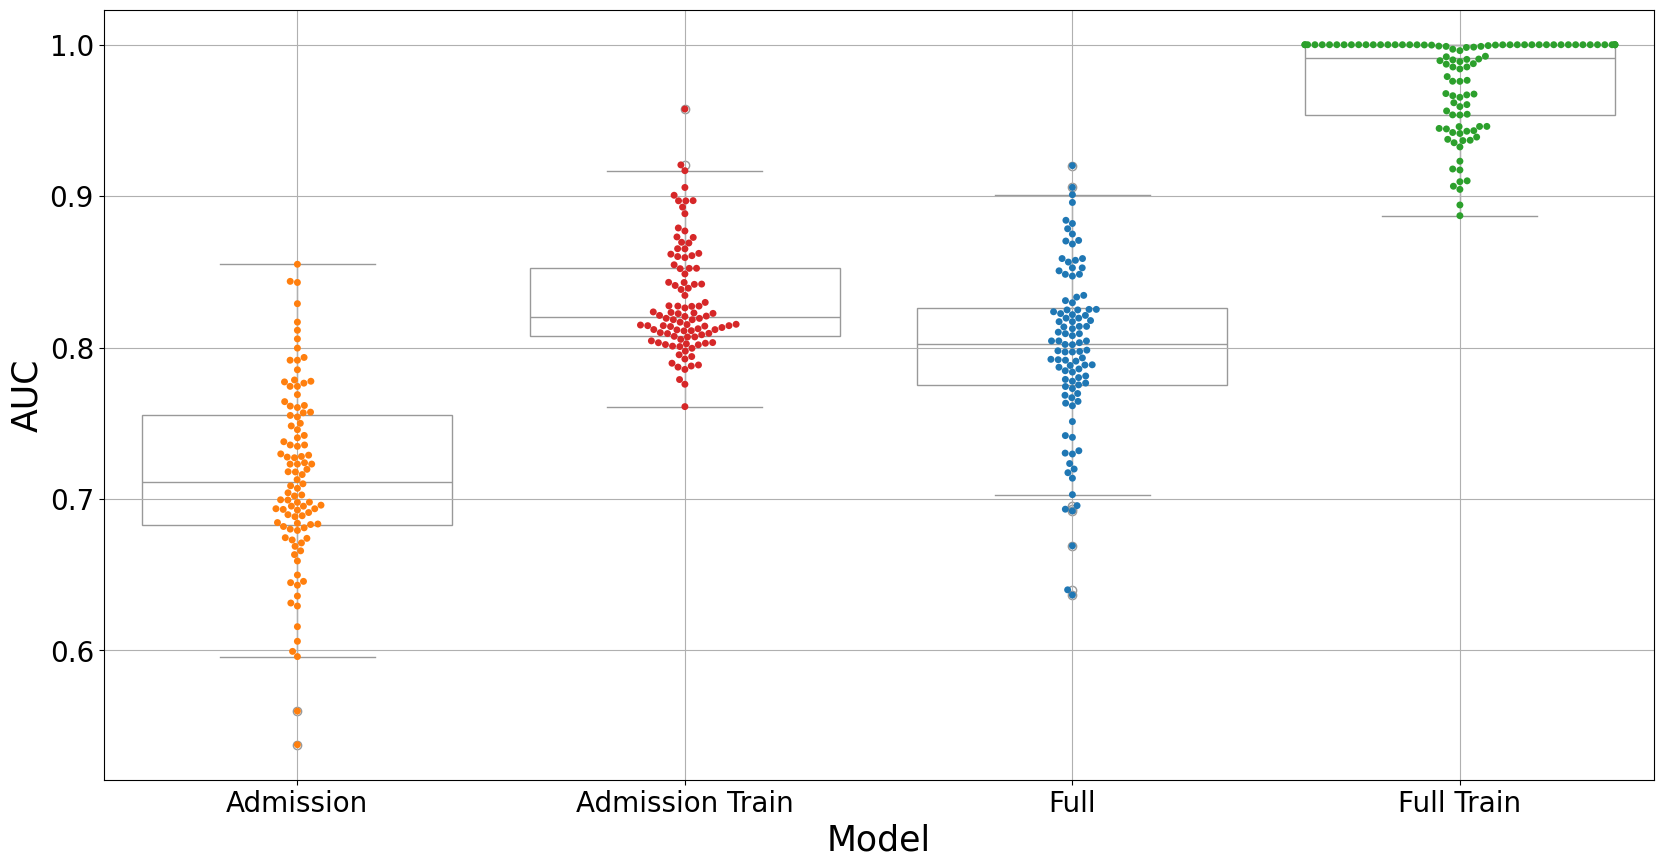

In [3]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"
results_full = pd.read_csv(results_dir + "Full_direct_remove.csv", index_col=0)
results_full = results_full[results_full["Thresholds"] == 0.5]
results_full = results_full[results_full["Number of Removed Features"] == 0]
results_full["Random State"] =  False


results_full_train = pd.read_csv(results_dir + "Full_training.csv", index_col=0)
results_full_train = results_full_train[results_full_train["Thresholds"] == 0.5]
results_full_train = results_full_train[results_full_train["Number of Removed Features"] == 0]
results_full_train["Random State"] =  False


results = pd.concat([results_full, results_admission, results_full_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Full",
                "Full Train", 
                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)
plt.grid()

# Train test performance with old reg parapmeters

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


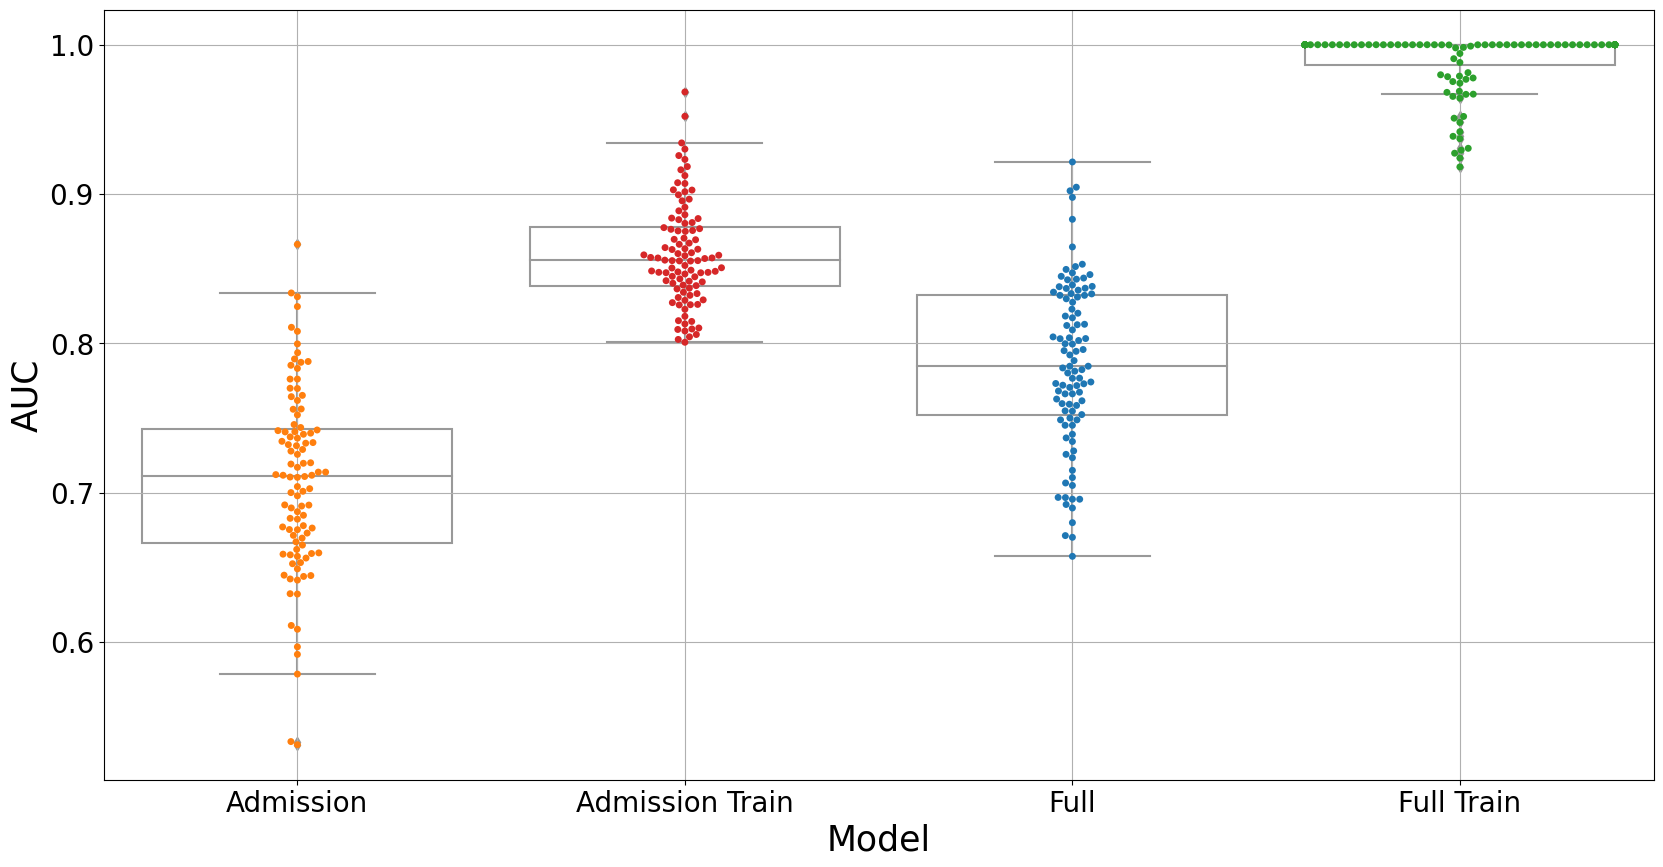

In [5]:

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"
results_full = pd.read_csv(results_dir + "Full_big_experiment_direct_remove_v3.csv", index_col=0)

results_full_filter = results_full[results_full["Thresholds"] == 0.5]
results_full_filter = results_full_filter[results_full_filter["Number of Removed Features"] == 0]

results_full_filter["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"
results_admission_optuna = pd.read_csv(results_dir + "Admission_big_experiment_direct_remove.csv", index_col=0)

results_admission_optuna = results_admission_optuna[results_admission_optuna["Thresholds"] == 0.5]
results_admission_optuna = results_admission_optuna[results_admission_optuna["Number of Removed Features"] == 0]

results_admission_optuna["Random State"] =  False


results_full_train = pd.read_csv(results_dir + "Full_big_experiment_training_v3.csv", index_col=0)
results_full_train = results_full_train[results_full_train["Thresholds"] == 0.5]
results_full_train = results_full_train[results_full_train["Number of Removed Features"] == 0]
results_full_train["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_big_experiment_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False


results = pd.concat([results_full_filter, results_admission_optuna, results_full_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Full",
                "Full Train", 

                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)

plt.grid()

# Differences Range 1 Range 2 

In [9]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/corrected_lactate/"
results_full = pd.read_csv(data_dir + "Full_direct_remove.csv", index_col=0)

results_full_filter = results_full[results_full["Thresholds"] == 0.5]
results_full_filter = results_full_filter[results_full_filter["Number of Removed Features"] == 0]

results_full_filter["Random State"] =  False

results_full_train = pd.read_csv(data_dir + "Full_training.csv", index_col=0)
results_full_train = results_full_train[results_full_train["Thresholds"] == 0.5]
results_full_train = results_full_train[results_full_train["Number of Removed Features"] == 0]
results_full_train["Random State"] =  False

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission_optuna = pd.read_csv(data_dir + "Admission_direct_remove.csv", index_col=0)

results_admission_optuna = results_admission_optuna[results_admission_optuna["Thresholds"] == 0.5]
results_admission_optuna = results_admission_optuna[results_admission_optuna["Number of Removed Features"] == 0]

results_admission_optuna["Random State"] =  False


results_admission_train = pd.read_csv(data_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False


results = pd.concat([results_full_filter, results_admission_optuna, results_full_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Full",
                "Full Train", 

                ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")

Admission
Balanced ACC: 0.646 [0.531/0.761]
AUC: 0.715 [0.598/0.832]
F1: 0.618 [0.483/0.753]
Specificity: 0.687 [0.53/0.844]
Sensitivity: 0.605 [0.432/0.778]
Admission Train
Balanced ACC: 0.744 [0.673/0.815]
AUC: 0.831 [0.76/0.902]
F1: 0.725 [0.648/0.802]
Specificity: 0.782 [0.719/0.845]
Sensitivity: 0.707 [0.62/0.794]
Full
Balanced ACC: 0.707 [0.592/0.822]
AUC: 0.799 [0.69/0.908]
F1: 0.633 [0.472/0.794]
Specificity: 0.817 [0.704/0.93]
Sensitivity: 0.597 [0.395/0.799]
Full Train
Balanced ACC: 0.937 [0.808/1.066]
AUC: 0.976 [0.914/1.038]
F1: 0.925 [0.77/1.08]
Specificity: 0.97 [0.903/1.037]
Sensitivity: 0.905 [0.715/1.095]


In [6]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"
results_full = pd.read_csv(results_dir + "Full_big_experiment_direct_remove_v3.csv", index_col=0)

results_full_filter = results_full[results_full["Thresholds"] == 0.5]
results_full_filter = results_full_filter[results_full_filter["Number of Removed Features"] == 0]

results_full_filter["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"
results_admission_optuna = pd.read_csv(results_dir + "Admission_big_experiment_direct_remove.csv", index_col=0)

results_admission_optuna = results_admission_optuna[results_admission_optuna["Thresholds"] == 0.5]
results_admission_optuna = results_admission_optuna[results_admission_optuna["Number of Removed Features"] == 0]

results_admission_optuna["Random State"] =  False


results_full_train = pd.read_csv(results_dir + "Full_big_experiment_training_v3.csv", index_col=0)
results_full_train = results_full_train[results_full_train["Thresholds"] == 0.5]
results_full_train = results_full_train[results_full_train["Number of Removed Features"] == 0]
results_full_train["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_big_experiment_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False


results = pd.concat([results_full_filter, results_admission_optuna, results_full_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Full",
                "Full Train", 

                ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")

Admission
Balanced ACC: 0.639 [0.524/0.754]
AUC: 0.708 [0.585/0.831]
F1: 0.611 [0.476/0.746]
Specificity: 0.679 [0.52/0.838]
Sensitivity: 0.599 [0.426/0.772]
Admission Train
Balanced ACC: 0.77 [0.697/0.843]
AUC: 0.86 [0.793/0.927]
F1: 0.752 [0.671/0.833]
Specificity: 0.808 [0.746/0.87]
Sensitivity: 0.732 [0.639/0.825]
Full
Balanced ACC: 0.704 [0.591/0.817]
AUC: 0.786 [0.675/0.897]
F1: 0.631 [0.472/0.79]
Specificity: 0.808 [0.677/0.939]
Sensitivity: 0.601 [0.389/0.813]
Full Train
Balanced ACC: 0.97 [0.869/1.071]
AUC: 0.989 [0.947/1.031]
F1: 0.964 [0.845/1.083]
Specificity: 0.984 [0.93/1.038]
Sensitivity: 0.955 [0.806/1.104]


# Admission model on 24hs expired patients

Percentages or correctly critical patients classified
73.44%


(-0.5, 9.5)

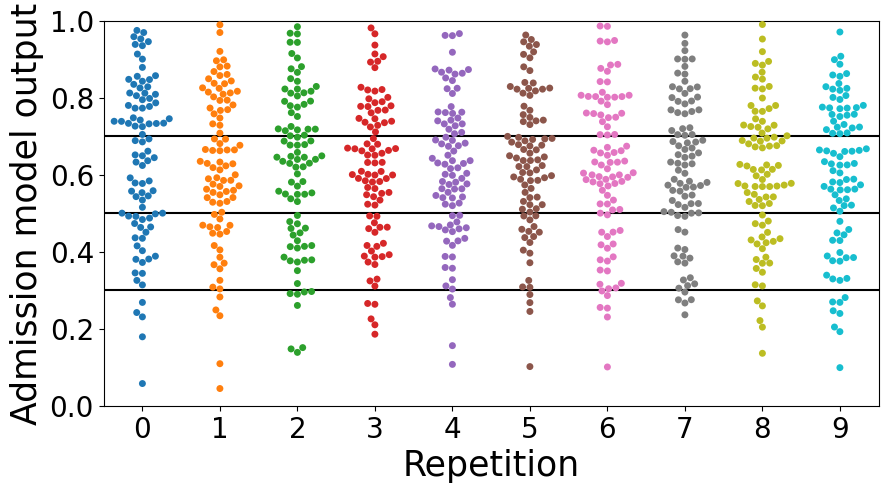

In [52]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

y_true = pd.read_csv(data_dir +"y_true_Admission.csv", index_col=0)

y_pred = pd.read_csv(data_dir +"Admission_predictions.csv", index_col=0)

y_severity = pd.read_csv(data_dir +"severity_Admission.csv", index_col=0)

y_severity = y_severity.astype(bool)

y_true = y_true[y_severity]
y_pred = y_pred[y_severity]

y_true = y_true.T
y_pred = y_pred.T

# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

# percentages or correctly critical patients classified
reshape_pred_round = round(reshape_pred)
print("Percentages or correctly critical patients classified")
print(str(round((reshape_pred_round.sum()*100/90).mean(),2))+"%")

all_predictions = []
repetition = []
reshape_pred.iloc[:,0].dropna()
df_pred = pd.DataFrame()
for c, col in enumerate(reshape_pred.columns):
    all_predictions.append(reshape_pred.iloc[:,c].dropna())
    repetition.append(c)
    df_pred[c] = reshape_pred.iloc[:,c].dropna().values
    # if c == 0:
    #     df_pred = columna
    # else:
    #     df_pred = pd.concat([df_pred, columna], axis=1)
plt.figure(figsize=[10,5])
sns.swarmplot(data=df_pred)
plt.plot([-.5,9.5],[0.5,0.5], c="black")
plt.plot([-.5,9.5],[0.3,0.3], c="black")
plt.plot([-.5,9.5],[0.7,0.7], c="black")

plt.xlabel("Repetition")
plt.ylabel("Admission model output")
plt.ylim([0,1])
plt.xlim([-.5,9.5])

# Threshold

The label '_none' of <matplotlib.collections.PolyCollection object at 0x7f7b100319a0> starts with '_'. It is thus excluded from the legend.
The label '_none' of <matplotlib.collections.PolyCollection object at 0x7f7b0b7d2820> starts with '_'. It is thus excluded from the legend.


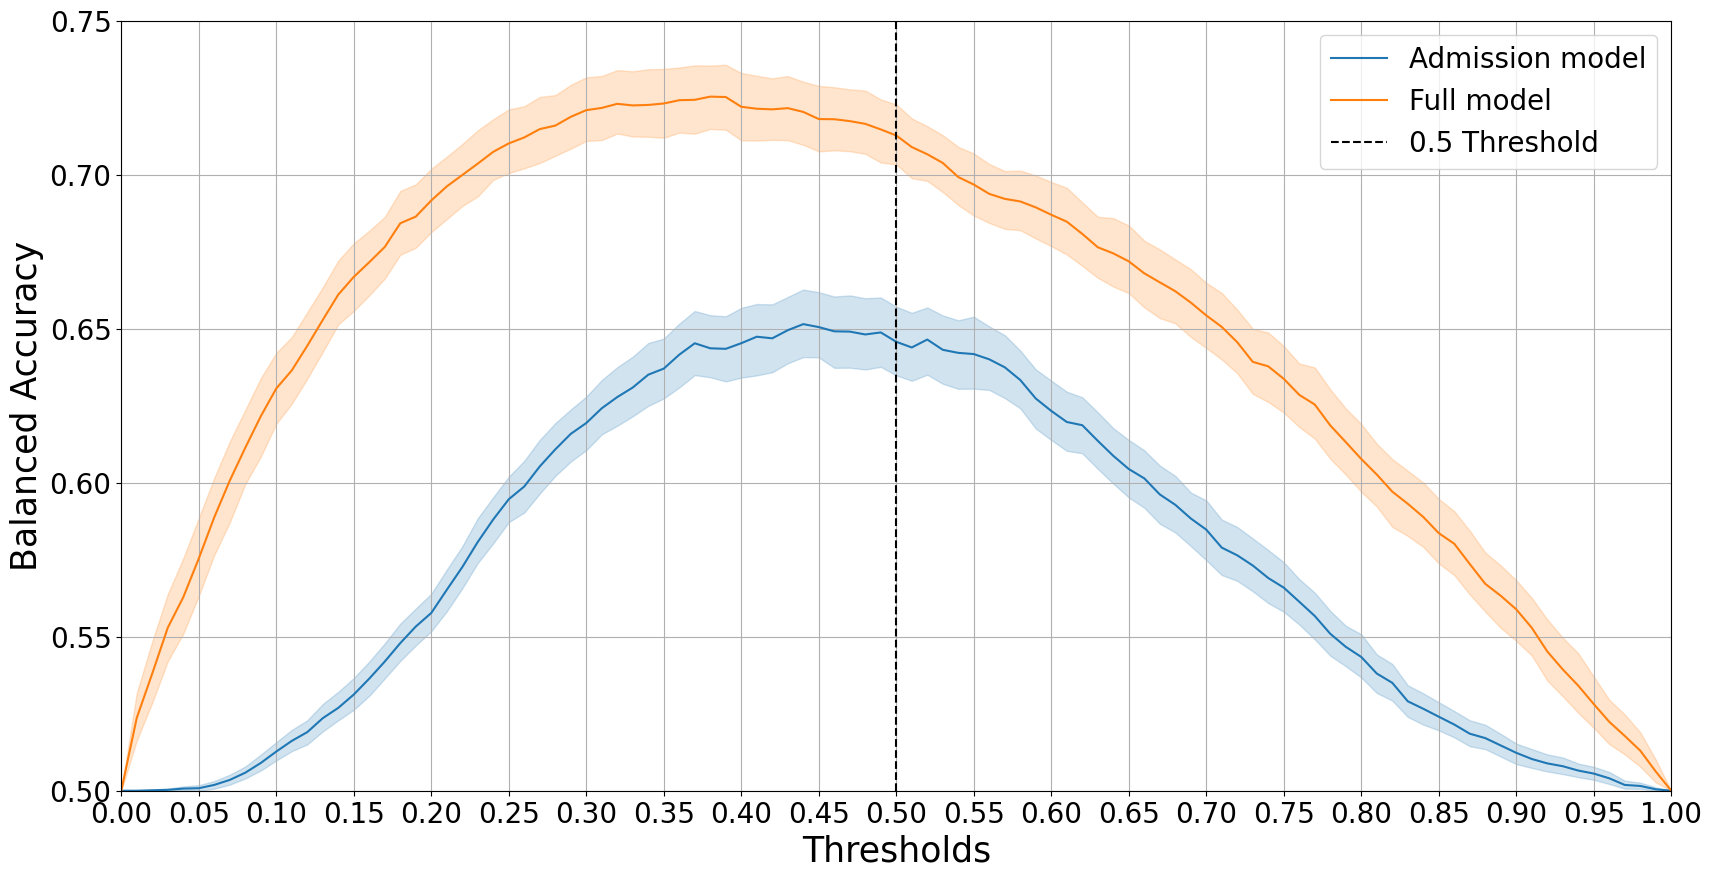

In [6]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"
results_full = pd.read_csv(results_dir + "Full_direct_remove.csv", index_col=0)
results_full = results_full[results_full["Number of Removed Features"] == 0]
results_full["Random State"] =  False

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
metric_to_plot = "Balanced ACC"

model_to_plot = "Admission"
results_ths_df_to_plot = results_admission[results_admission["Model"] == model_to_plot]   # noqa
sns.lineplot(data=results_ths_df_to_plot, y=metric_to_plot, x="Thresholds")
plt.ylabel("Performance")

model_to_plot = "Full"
results_ths_df_to_plot = results_full[results_full["Model"] == model_to_plot]   # noqa
sns.lineplot(data=results_ths_df_to_plot, y=metric_to_plot, x="Thresholds")
ths = 0.5

sns.lineplot(x=[ths-.00000001, ths+.00000001], y=[0.50, .8], ax=ax, color="black", linestyle="--", legend=True)
plt.ylim([0.5,0.75])
plt.xlim([0,1])
plt.ylabel("Balanced Accuracy")
plt.title("")
plt.grid()


plt.legend(["Admission model", "_none", "Full model", "_none", "0.5 Threshold"])
custom_ticks = np.arange(0, 1.01, 0.05)  # Range from 0 to 1 with step of 0.1
plt.xticks(custom_ticks)
plt.show()

# Table comparing LG and Admission

In [31]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/LG_compare/"

results_admission = pd.read_csv(results_dir + "Admission_complete.csv", index_col=0)
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

LG_resutls = pd.read_csv(results_dir + "LG_Admission_complete.csv", index_col=0)

LG_resutls.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

LG_test = LG_resutls[LG_resutls["Model"]== "LG_complete_admission_test"]

results_df = pd.concat([results_admission,LG_test])

results_true_label = results_df


models_to_plot = [
                  "Admission complete",
                #   "24hs",
                  "LG_complete_admission_test",
                #   "CLIP_SCORE", 
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")


Admission complete
Balanced ACC: 0.636 [0.511/0.761]
AUC: 0.695 [0.562/0.828]
F1: 0.582 [0.427/0.737]
Specificity: 0.715 [0.554/0.876]
Sensitivity: 0.557 [0.361/0.753]
LG_complete_admission_test
Balanced ACC: 0.672 [0.565/0.779]
AUC: 0.735 [0.616/0.854]
F1: 0.628 [0.497/0.759]
Specificity: 0.734 [0.567/0.901]
Sensitivity: 0.609 [0.426/0.792]


# Compare Admission with admission imputed data 

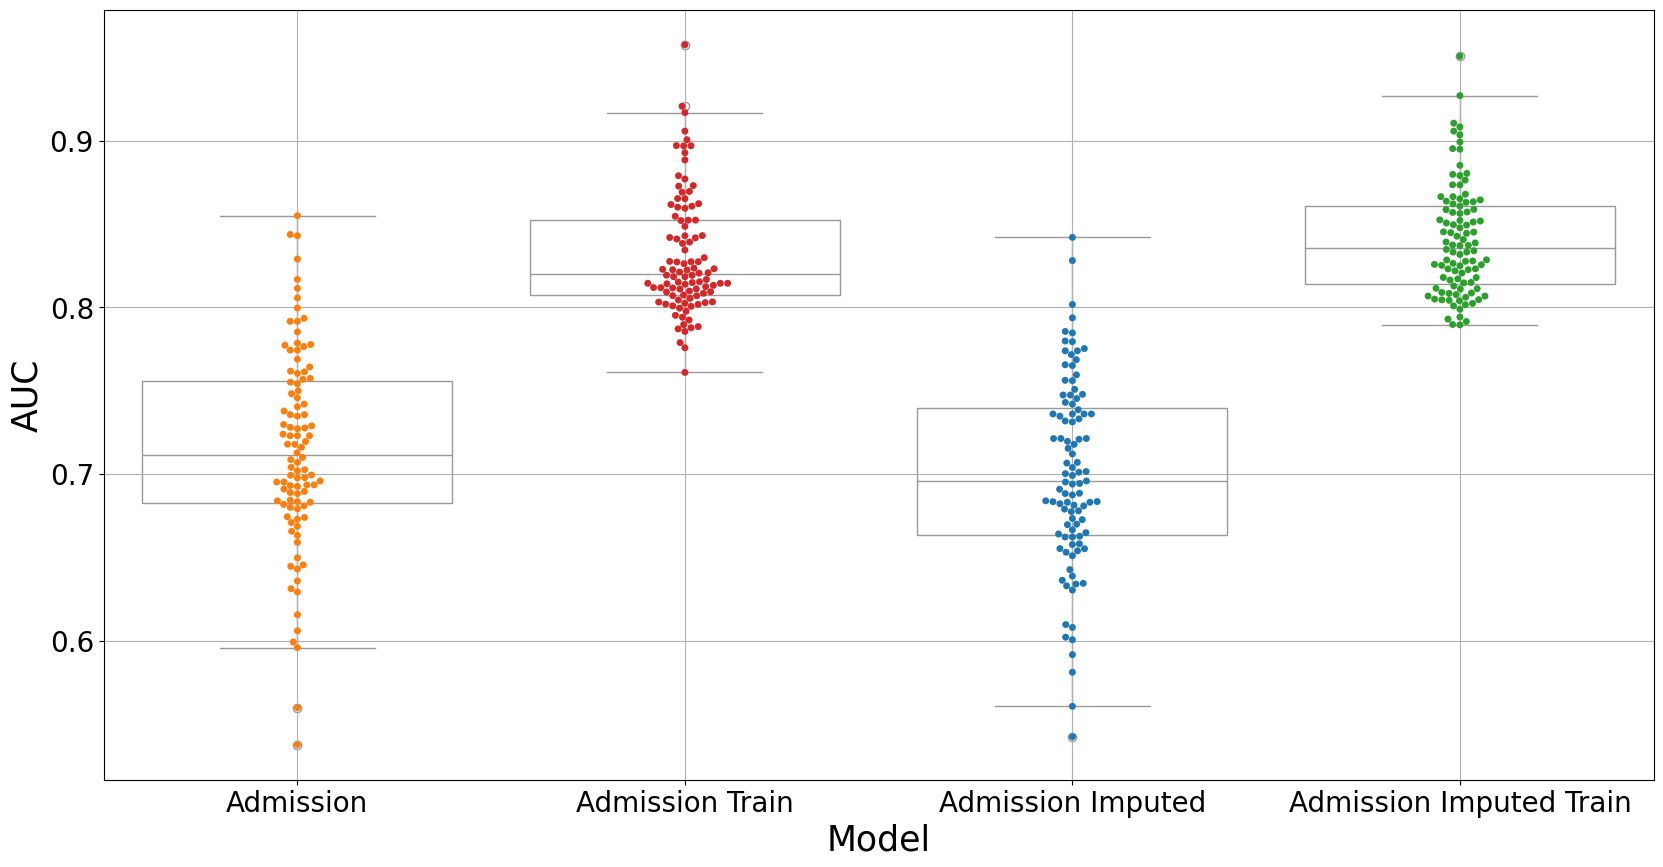

In [155]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/imputed_data/"
results_admission_imp = pd.read_csv(results_dir + "Admission_imp_big_experiment_direct_remove2.csv", index_col=0)
results_admission_imp = results_admission_imp[results_admission_imp["Thresholds"] == 0.5]
results_admission_imp = results_admission_imp[results_admission_imp["Number of Removed Features"] == 0]
results_admission_imp["Random State"] =  False
results_admission_imp["Model"] = "Admission Imputed"

results_admission_imp_train = pd.read_csv(results_dir + "Admission_imp_big_experiment_training2.csv", index_col=0)
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Thresholds"] == 0.5]
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Number of Removed Features"] == 0]
results_admission_imp_train["Random State"] =  False
results_admission_imp_train["Model"] = "Admission Imputed Train"


results = pd.concat([results_admission_imp, results_admission, results_admission_imp_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Admission Imputed",
                "Admission Imputed Train", 
                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)
plt.grid()

In [157]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/imputed_data/"
results_admission_imp = pd.read_csv(results_dir + "Admission_imp_big_experiment_direct_remove2.csv", index_col=0)
results_admission_imp = results_admission_imp[results_admission_imp["Thresholds"] == 0.5]
results_admission_imp = results_admission_imp[results_admission_imp["Number of Removed Features"] == 0]
results_admission_imp["Random State"] =  False
results_admission_imp["Model"] = "Admission Imputed"
results_admission_imp.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)


results_true_label = results_admission_imp


models_to_plot = [
                  "Admission Imputed",
                #   "24hs",
                #   "CLIP_SCORE", 
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")


Admission Imputed
Balanced ACC: 0.634 [0.535/0.733]
AUC: 0.7 [0.587/0.813]
F1: 0.609 [0.486/0.732]
Specificity: 0.664 [0.521/0.807]
Sensitivity: 0.603 [0.434/0.772]


# Admission vs Admission with less features

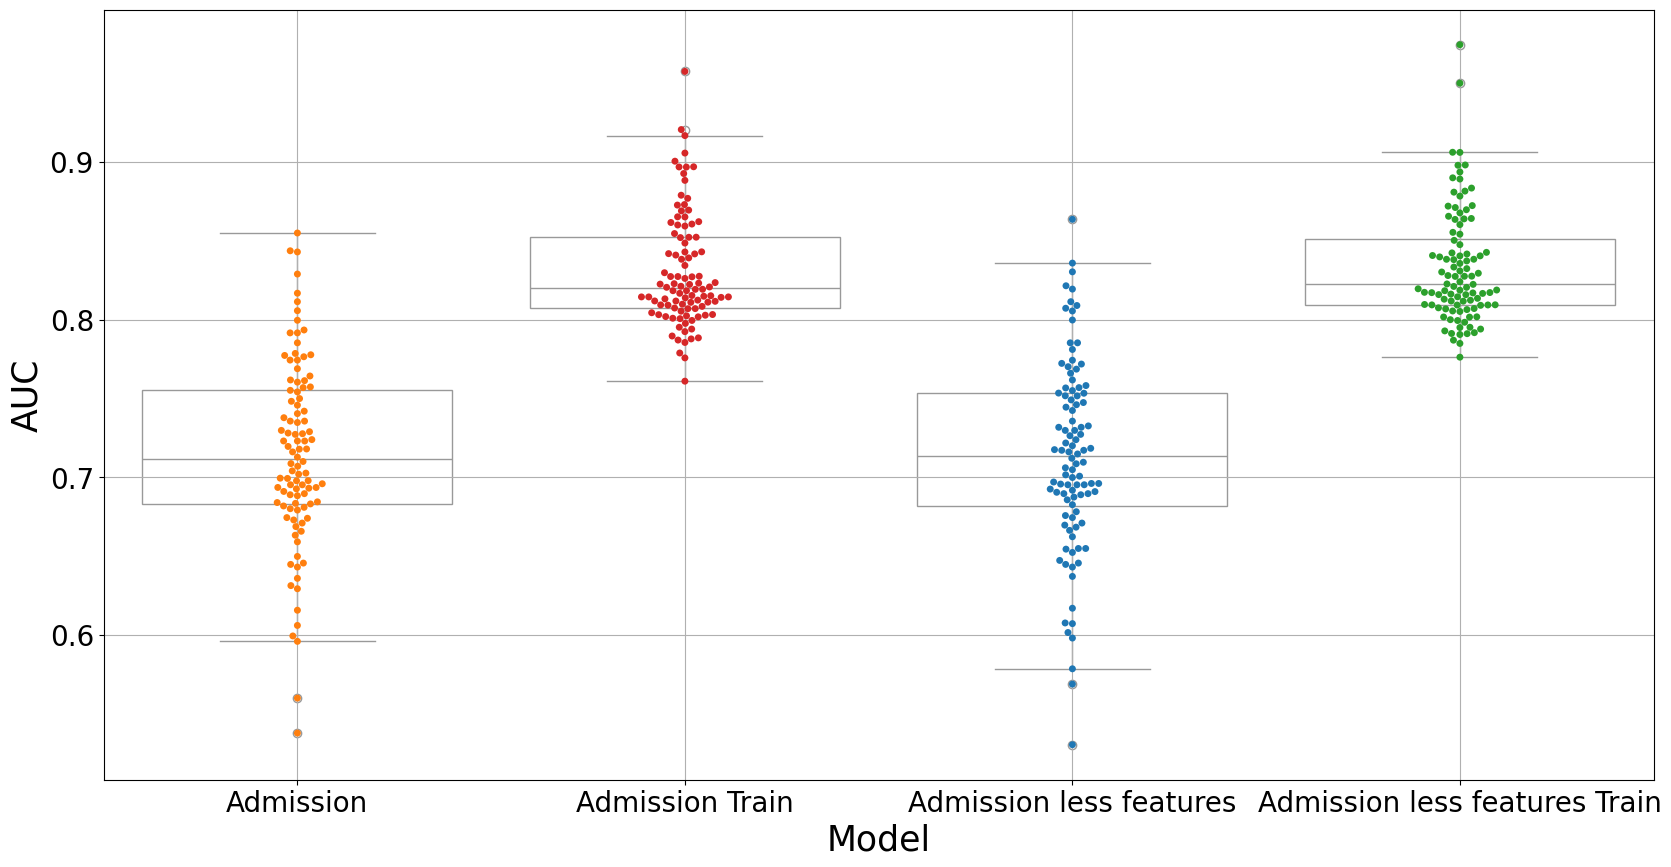

In [2]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

results_admission_train = pd.read_csv(results_dir + "Admission_training.csv", index_col=0)
results_admission_train = results_admission_train[results_admission_train["Thresholds"] == 0.5]
results_admission_train = results_admission_train[results_admission_train["Number of Removed Features"] == 0]
results_admission_train["Random State"] =  False

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/less_features/"       # noqa
results_admission_imp = pd.read_csv(results_dir + "Admission_big_experiment_random_remove_less_features.csv", index_col=0)
results_admission_imp = results_admission_imp[results_admission_imp["Thresholds"] == 0.5]
results_admission_imp = results_admission_imp[results_admission_imp["Number of Removed Features"] == 0]
results_admission_imp["Random State"] =  False
results_admission_imp["Model"] = "Admission less features"

results_admission_imp_train = pd.read_csv(results_dir + "Admission_big_experiment_training_less_features.csv", index_col=0)
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Thresholds"] == 0.5]
results_admission_imp_train = results_admission_imp_train[results_admission_imp_train["Number of Removed Features"] == 0]
results_admission_imp_train["Random State"] =  False
results_admission_imp_train["Model"] = "Admission less features Train"


results = pd.concat([results_admission_imp, results_admission, results_admission_imp_train, results_admission_train])

# 
results_true_label = results[results["Random State"]== False]

# results_true_label.replace({"Admission_Train": "Admission Train", "24hs_Train": "Full Train"}, inplace= True)

metric_to_plot = "AUC"

models_to_plot = [
                "Admission",
                "Admission Train", 
                "Admission less features",
                "Admission less features Train", 
                ]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])


sns.swarmplot(
    data=results_true_label,
    x="Model", y=metric_to_plot,
    order=models_to_plot, 
    dodge=False, hue="Model", ax=ax,
    # palette=[[1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           [1, 0.1, 0.1],
    #                                           [0.1, 0.2, 0.2],
    #                                           ]
)

sns.boxplot(
    data=results_true_label, color="w", zorder=1,
    x="Model", y=metric_to_plot,
    order=models_to_plot,
    dodge=True, ax=ax
)
plt.legend([], framealpha = 0)
plt.grid()

In [18]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/CULPRIT_data/202302_Jung/" # noqa
# endpoint to use
endpoint_to_use = "fu_ce_death_le30d_yn"    # or "fu_ce_death_le365d_yn"

# Get different features depending on the model
# Get all data
patient_info = load_CULPRIT_data(data_dir)
# Set target
y = patient_info.loc[:, ["patient_ID", endpoint_to_use]]


# Extract all the 24hs available features
exp_name = "Admission"
patient_features = get_features(exp_name)

data = get_data_from_features(patient_info, patient_features)

patient_measures = pd.concat([data, y["fu_ce_death_le30d_yn"]], axis=1)
patient_measures.columns


/home/nnieto/Nico/MODS_project/CULPRIT_project/MODS_CULPRIT_project/code/lib/data_load_utils.py:225: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cate_df.replace({True: 1, False: 0}, inplace=True)
/home/nnieto/Nico/MODS_project/CULPRIT_project/MODS_CULPRIT_project/code/lib/data_load_utils.py:258: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rrt_df.replace({True: 1, False: 0}, inplace=True)
/home/nnieto/Nico/MODS_project/CULPRIT_project/MODS_CULPRIT_project/code/lib/data_load_utils.py:283: FutureWarning: Downcasting behavior in `

Index(['had_dem_age_yr', 'had_dem_male_yn', 'had_pex_weight_kg',
       'had_pex_height_cm', 'previous_heart_complications', 'p_mh_hfail_yn',
       'p_mh_stroke_yn', 'p_mh_pad_yn', 'p_mh_renf_yn', 'p_mh_dial_yn',
       'p_rf_smoker_yn', 'p_rf_aht_yn', 'p_rf_dyslip_yn', 'p_rf_dm_yn',
       'hpr_ecg_sinrhy_y', 'hpr_ecg_afib_y', 'hpr_ecg_avblock3_y',
       'hpr_ecg_stemi_yn', 'hpr_hmdyn_hr_bpm', 'hpr_hmdyn_sbp_mmhg',
       'hpr_hmdyn_dbp_mmhg', 'had_sy_ams_yn', 'had_sy_extremity_yn',
       'had_base_mechvent_yn', 'had_base_cpr24h_yn', 'fu_ce_death_le30d_yn'],
      dtype='object')

/tmp/ipykernel_127251/1338194299.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patient_measures["Current Smoker"].replace({0: "No", 1: "Yes", }, inplace=True)
/tmp/ipykernel_127251/1338194299.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

<AxesSubplot: xlabel='30-day outcome', ylabel='Age'>

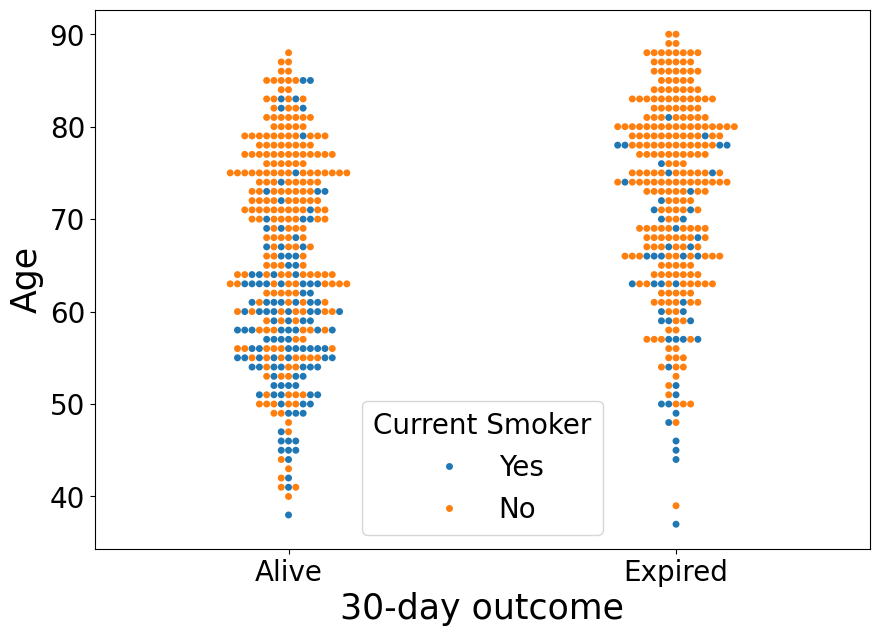

In [14]:

import seaborn as sbn

patient_measures.rename(columns={"had_dem_age_yr": "Age"}, inplace=True)

patient_measures.rename(columns={"p_rf_smoker_yn": "Current Smoker"},
                        inplace=True)
patient_measures["Current Smoker"].replace({0: "No", 1: "Yes", }, inplace=True)

patient_measures.rename(columns={"fu_ce_death_le30d_yn": "30-day outcome"}, inplace=True)
patient_measures["30-day outcome"].replace({1: "Expired", 0: "Alive",}, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=[10, 7])

sbn.swarmplot(patient_measures, y="Age", hue="Current Smoker", x= "30-day outcome", ax=ax)

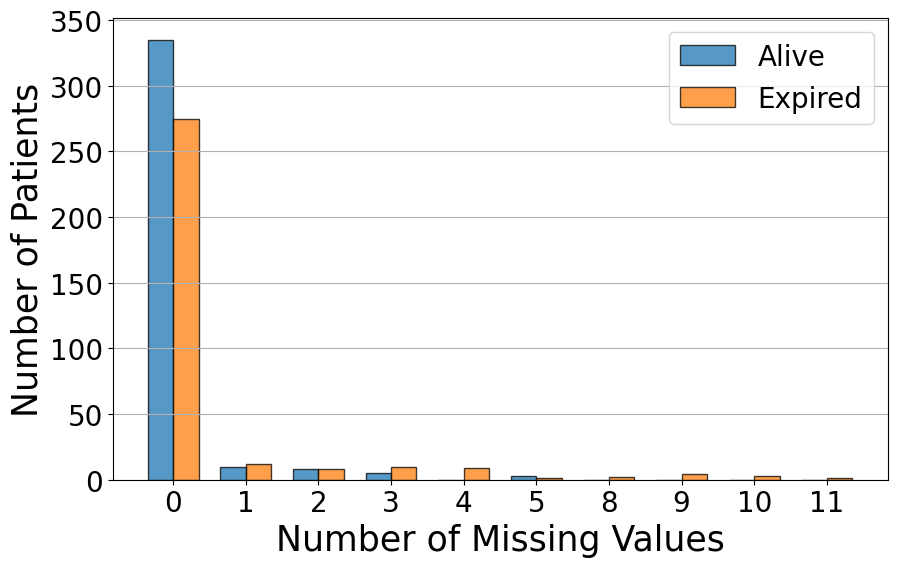

In [84]:
missing_values_per_row_data = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 0 ].isnull().sum(axis=1)
missing_values_per_row_data2 = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 1 ].isnull().sum(axis=1)

# Create a count of missing values for each dataset
missing_counts_data = missing_values_per_row_data.value_counts().sort_index()
missing_counts_data2 = missing_values_per_row_data2.value_counts().sort_index()


# Make sure both series have the same index by reindexing with the union of both indexes
all_indexes = sorted(set(missing_counts_data.index).union(set(missing_counts_data2.index)))
missing_counts_data = missing_counts_data.reindex(all_indexes, fill_value=0)
missing_counts_data2 = missing_counts_data2.reindex(all_indexes, fill_value=0)

# Plot a grouped bar plot
x = np.arange(len(all_indexes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, missing_counts_data, width, label='Alive',alpha=0.75, edgecolor='black',)
bars2 = ax.bar(x + width/2, missing_counts_data2, width, label='Expired', alpha=0.75, edgecolor='black',)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Missing Values')
plt.ylabel('Number of Patients')
ax.set_xticks(x)
ax.set_xticklabels(all_indexes)
ax.legend()


# Add a grid
ax.grid(axis='y')
ax.set_yscale('linear')

# Display the plot
plt.show()

5 Features deleted


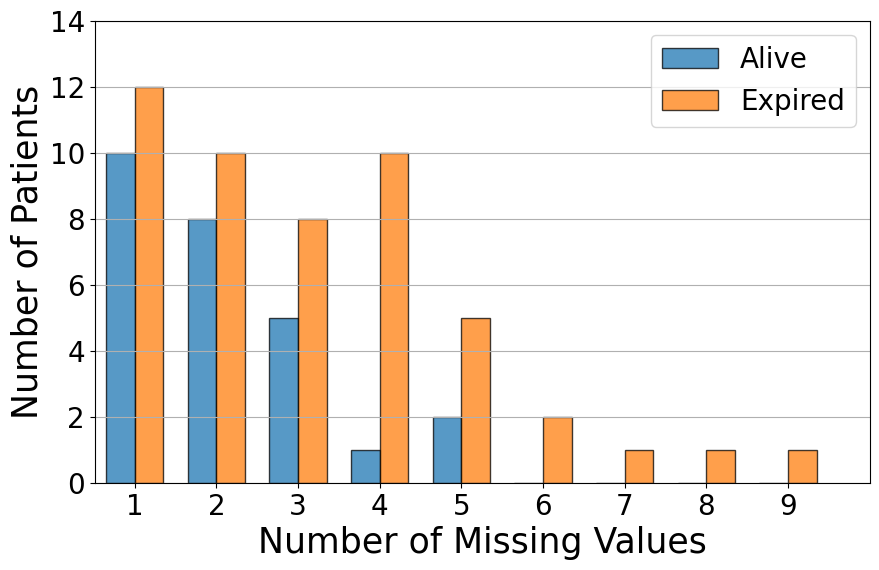

In [147]:
from lib.data_processing import remove_low_variance_features
# Extract all the 24hs available features
exp_name = "Admission"
patient_features = get_features(exp_name)
# Removing patients that died in the first 24hs

data = get_data_from_features(patient_info, patient_features)
X = remove_low_variance_features(data, 0.1)

patient_measures = pd.concat([X, patient_info["fu_ce_death_le30d_yn"]], axis=1)

missing_values_per_row_data = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 0 ].isnull().sum(axis=1)
missing_values_per_row_data2 = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 1 ].isnull().sum(axis=1)

# Create a count of missing values for each dataset
missing_counts_data = missing_values_per_row_data.value_counts().sort_index()
missing_counts_data2 = missing_values_per_row_data2.value_counts().sort_index()

# Make sure both series have the same index by reindexing with the union of both indexes
all_indexes = sorted(set(missing_counts_data.index).union(set(missing_counts_data2.index)))
missing_counts_data = missing_counts_data.reindex(all_indexes, fill_value=0)
missing_counts_data2 = missing_counts_data2.reindex(all_indexes, fill_value=0)

# Plot a grouped bar plot
x = np.arange(len(all_indexes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, missing_counts_data, width, label='Alive',alpha=0.75, edgecolor='black',)
bars2 = ax.bar(x + width/2, missing_counts_data2, width, label='Expired', alpha=0.75, edgecolor='black',)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Missing Values')
plt.ylabel('Number of Patients')
ax.set_xticks(x)
ax.set_xticklabels(all_indexes)
ax.legend()
plt.xlim([0.51,10])
plt.ylim([0,14])

# Add a grid
ax.grid(axis='y')
ax.set_yscale('linear')

# Display the plot
plt.show()

10 Features deleted


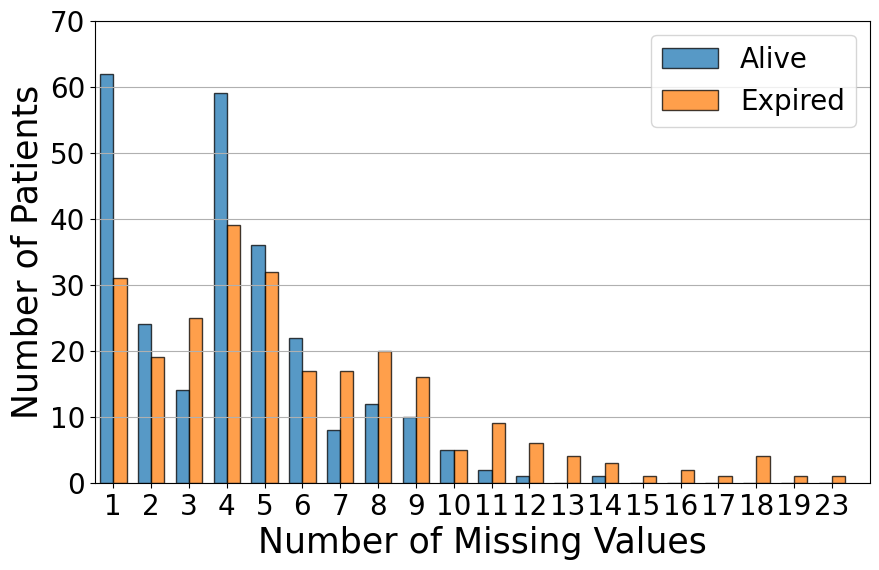

In [154]:
from lib.data_processing import remove_low_variance_features
# Extract all the 24hs available features
exp_name = "24hs"
patient_features = get_features(exp_name)
# Removing patients that died in the first 24hs

# patient_info2 = patient_info[patient_info["fu_ce_Death_d"] != 0]

data = get_data_from_features(patient_info, patient_features)
X = remove_low_variance_features(data, 0.1)


patient_measures = pd.concat([X, patient_info["fu_ce_death_le30d_yn"]], axis=1)


missing_values_per_row_data = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 0 ].isnull().sum(axis=1)
missing_values_per_row_data2 = patient_measures[patient_measures["fu_ce_death_le30d_yn"] == 1 ].isnull().sum(axis=1)

# Create a count of missing values for each dataset
missing_counts_data = missing_values_per_row_data.value_counts().sort_index()
missing_counts_data2 = missing_values_per_row_data2.value_counts().sort_index()

# Make sure both series have the same index by reindexing with the union of both indexes
all_indexes = sorted(set(missing_counts_data.index).union(set(missing_counts_data2.index)))
missing_counts_data = missing_counts_data.reindex(all_indexes, fill_value=0)
missing_counts_data2 = missing_counts_data2.reindex(all_indexes, fill_value=0)

# Plot a grouped bar plot
x = np.arange(len(all_indexes))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, missing_counts_data, width, label='Alive',alpha=0.75, edgecolor='black',)
bars2 = ax.bar(x + width/2, missing_counts_data2, width, label='Expired', alpha=0.75, edgecolor='black',)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Missing Values')
plt.ylabel('Number of Patients')
ax.set_xticks(x)
ax.set_xticklabels(all_indexes)
ax.legend()
plt.xlim([0.51,21])
plt.ylim([0,70])

# Add a grid
ax.grid(axis='y')
ax.set_yscale('linear')

# Display the plot
plt.show()

In [3]:
275*100/686

40.08746355685131